## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [109]:
print('Training independent variables')
print (x_train.shape)
print('Training target data')
print(y_train.shape)
print('Test independent variables')
print (x_test.shape)
print('Test target data')
print(y_test.shape)

Training independent variables
(60000, 28, 28)
Training target data
(60000,)
Test independent variables
(10000, 28, 28)
Test target data
(10000,)


In [110]:
print(y_train)

[9 0 0 ... 3 0 5]


In [111]:
import numpy as np
np.random.seed(110) 
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

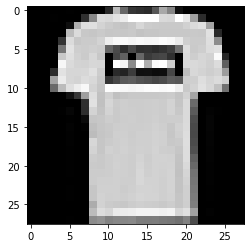

In [112]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1,:,:],cmap='gray')

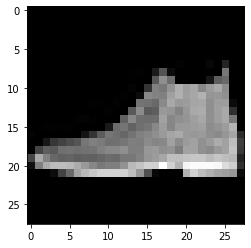

In [113]:
plt.imshow(x_test[0,:,:],cmap='gray')

### Find dimensions of an image in the dataset

In [114]:
print ('Shape of x_train is 60000*28*28 \nSo there are 60000 samples of pixels 28*28, hence dimension is 28*28')

Shape of x_train is 60000*28*28 
So there are 60000 samples of pixels 28*28, hence dimension is 28*28


In [115]:
import pandas as pd
L=pd.DataFrame(y_train)
L[0].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: 0, dtype: int64

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [116]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)
y_train[2]


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/= 255
x_test/= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [118]:
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0],28, 28,1)
x_train.shape

(60000, 28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [124]:
model=Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model.fit(x_train,y_train,batch_size=32,nb_epoch=10,verbose=1,callbacks=[es])
score = model.evaluate(x_test, y_test, verbose=0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.3702 - acc: 0.8669
Epoch 2/10
  960/60000 [..............................] - ETA: 10s - loss: 0.2463 - acc: 0.9156

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:842: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


60000/60000 [==============================] - 10s 175us/step - loss: 0.2251 - acc: 0.9166
Epoch 3/10
60000/60000 [==============================] - 10s 175us/step - loss: 0.1624 - acc: 0.9390
Epoch 4/10
60000/60000 [==============================] - 10s 173us/step - loss: 0.1120 - acc: 0.9583
Epoch 5/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.0739 - acc: 0.9730
Epoch 6/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.0462 - acc: 0.9833
Epoch 7/10
60000/60000 [==============================] - 10s 173us/step - loss: 0.0363 - acc: 0.9869
Epoch 8/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.0262 - acc: 0.9904
Epoch 9/10
60000/60000 [==============================] - 10s 175us/step - loss: 0.0223 - acc: 0.9919
Epoch 10/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0190 - acc: 0.9934


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [135]:
model=Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
model.fit(x_train,y_train,batch_size=32,nb_epoch=10,verbose=1,callbacks=[es])
score = model.evaluate(x_test, y_test, verbose=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


Epoch 1/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.3928 - acc: 0.8604
Epoch 2/10
 1120/60000 [..............................] - ETA: 8s - loss: 0.2667 - acc: 0.9036

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:842: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


60000/60000 [==============================] - 9s 143us/step - loss: 0.2554 - acc: 0.9052
Epoch 3/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.2086 - acc: 0.9225
Epoch 4/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.1741 - acc: 0.9338
Epoch 5/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.1472 - acc: 0.9448
Epoch 6/10
60000/60000 [==============================] - 8s 139us/step - loss: 0.1258 - acc: 0.9532
Epoch 7/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.1041 - acc: 0.9606
Epoch 8/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.0906 - acc: 0.9656
Epoch 9/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.0792 - acc: 0.9704
Epoch 10/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.0682 - acc: 0.9743


### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=90,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

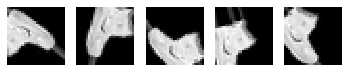

In [132]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [136]:
model.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/10
  10/1875 [..............................] - ETA: 24s - loss: 5.2981 - acc: 0.1688

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  after removing the cwd from sys.path.


1875/1875 [==============================] - 21s 11ms/step - loss: 1.6416 - acc: 0.3932 - val_loss: 1.1048 - val_acc: 0.6016
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 1.1677 - acc: 0.5755 - val_loss: 0.9234 - val_acc: 0.6709
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 1.0429 - acc: 0.6228 - val_loss: 0.9404 - val_acc: 0.6742
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.9685 - acc: 0.6483 - val_loss: 0.9371 - val_acc: 0.6793
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.9254 - acc: 0.6634 - val_loss: 0.8892 - val_acc: 0.6924
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.8873 - acc: 0.6789 - val_loss: 0.8175 - val_acc: 0.7203
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.8625 - acc: 0.6859 - val_loss: 0.7949 - val_acc: 0.7328
Epoch 8/10
1875/1875 [==============================] - 20s

###  Report the final train and validation accuracy

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)


In [139]:
print(score)

[0.7089703319072723, 0.7529]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=90,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images


### **Load CIFAR10 dataset**

In [0]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [155]:
print('Training independent variables')
print (x_train.shape)
print('Training target data')
print(y_train.shape)
print('Test independent variables')
print (x_test.shape)
print('Test target data')
print(y_test.shape)

Training independent variables
(50000, 32, 32, 3)
Training target data
(50000, 1)
Test independent variables
(10000, 32, 32, 3)
Test target data
(10000, 1)


In [156]:
x_train.dtype

dtype('uint8')

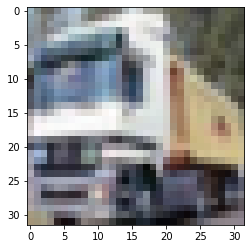

In [157]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1,:,:],cmap='gray')

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


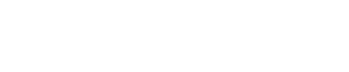

In [147]:
import keras
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
#save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model'

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [0]:
import keras
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
#save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model'



In [159]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



50000 train samples
10000 test samples


In [161]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Using real-time data augmentation.
Epoch 1/100
1563/1563 [==============================] - 32s 21ms/step - loss: 1.9035 - acc: 0.3034 - val_loss: 1.5816 - val_acc: 0.4355
Epoch 2/100
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5966 - acc: 0.4171 - val_loss: 1.4083 - val_acc: 0.4904
Epoch 3/100
1563/1563 [==============================] - 31s 20ms/step - loss: 1.4734 - acc: 0.4682 - val_loss: 1.3078 - val_acc: 0.5263
Epoch 4/100
1563/1563 [==============================] - 31s 20ms/step - loss: 1.3892 - acc: 0.4985 - val_loss: 1.2552 - val_acc: 0.5532
Epoch 5/100
1563/1563 [==============================] - 31s 20ms/step - loss: 1.3197 - acc: 0.5270 - val_loss: 1.2226 - val_acc: 0.5696
Epoch 6/100
1563/1563 [==============================] - 31s 20ms/step - loss: 1.2673 - acc: 0.5487 - val_loss: 1.1745 - val_acc: 0.5873
Epoch 7/100
1563/1563 [==============================] - 31s 20ms/step - loss: 1.2118 - acc: 0.5655 - val_loss: 1.0895 - val_acc: 0.6206
Epoch 

### **Prepare/fit the generator.**

In [153]:
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


NameError: ignored

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

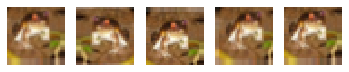

In [162]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()